<a href="https://colab.research.google.com/github/vnky21/Fashion-Retail-Analys/blob/main/SuperMarket_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SuperMarket Sales Data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://drive.google.com/file/d/1GrB3TS17jF8TD1gncIZPIp_iNpW2B8qW/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [52]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [94]:
df_new = df.copy()
df_new['Date Purchase'] = pd.to_datetime(df_new['Date Purchase'])
df_new['Purchase Amount (USD)'] = pd.to_numeric(df_new['Purchase Amount (USD)'], errors='coerce').fillna(0)
df_new['Review Rating'] = df_new['Review Rating'].round()

In [95]:
df_new['Month'] = df_new['Date Purchase'].dt.to_period('M')
df_new['Month'] = df_new['Month'].dt.to_timestamp()

In [ ]:
Month_purchase = df_new.groupby('Month', as_index=False)['Purchase Amount (USD)'].sum()
Month_sales = df_new.groupby('Month', as_index=False)['Customer Reference ID'].count()
print(Month_sales)

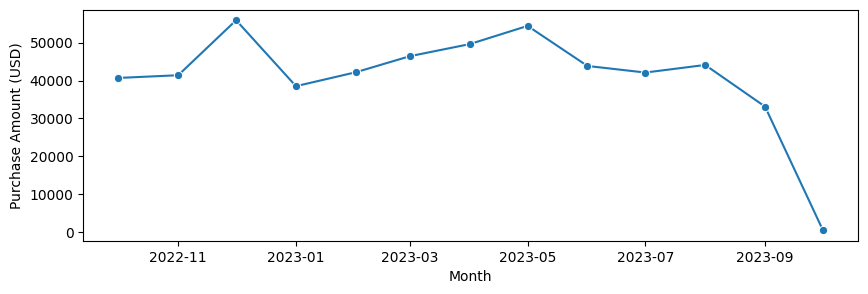

In [100]:
plt.figure(figsize=(10, 3))
sns.lineplot(x='Month', y='Purchase Amount (USD)', data=Month_purchase, marker='o')
plt.show()

Line Chart jumlah harga penjualan perbulan

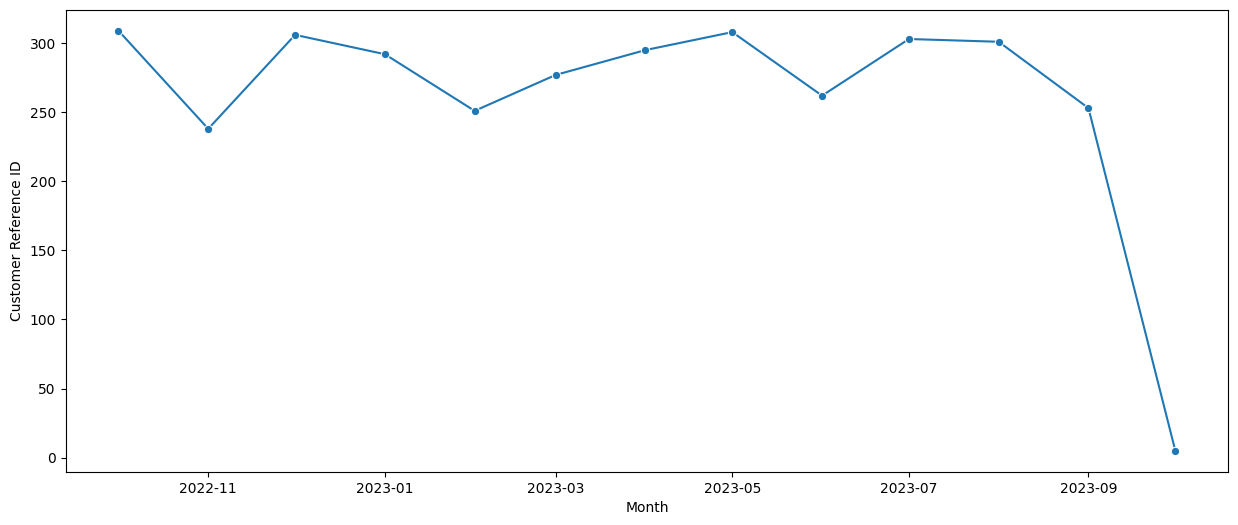

In [98]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Customer Reference ID', data=Month_sales, marker='o')
plt.show()

Lin Chart jumlah transaksi perbulan

In [10]:
df_new.columns

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method', 'Month'],
      dtype='object')

In [11]:
Rating_purchase = df_new.groupby(['Payment Method','Review Rating'], as_index=False)['Customer Reference ID'].nunique()
Rating_purchase.head()

,Payment Method,Review Rating,Customer Reference ID
0,Cash,1.0,102
1,Cash,2.0,152
2,Cash,3.0,145
3,Cash,4.0,149
4,Cash,5.0,109


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Rating', y='Customer Reference ID', data=Rating_purchase, hue='Payment Method')
plt.show()

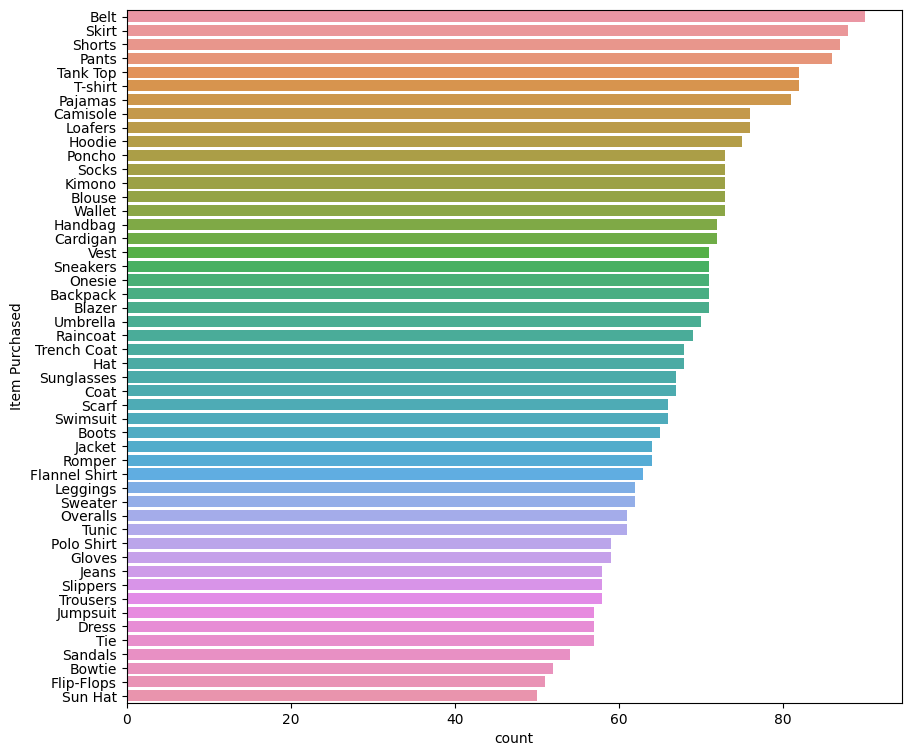

In [124]:
frequency_counts = df_new['Item Purchased'].value_counts()

df_new_sorted = df_new.loc[df_new['Item Purchased'].isin(frequency_counts.index)]

plt.figure(figsize=(10, 9))
sns.countplot(y='Item Purchased', data=df_new_sorted, order=frequency_counts.index)
plt.show()

Jumlah penjualan barang berdasarkan Item yang terjual

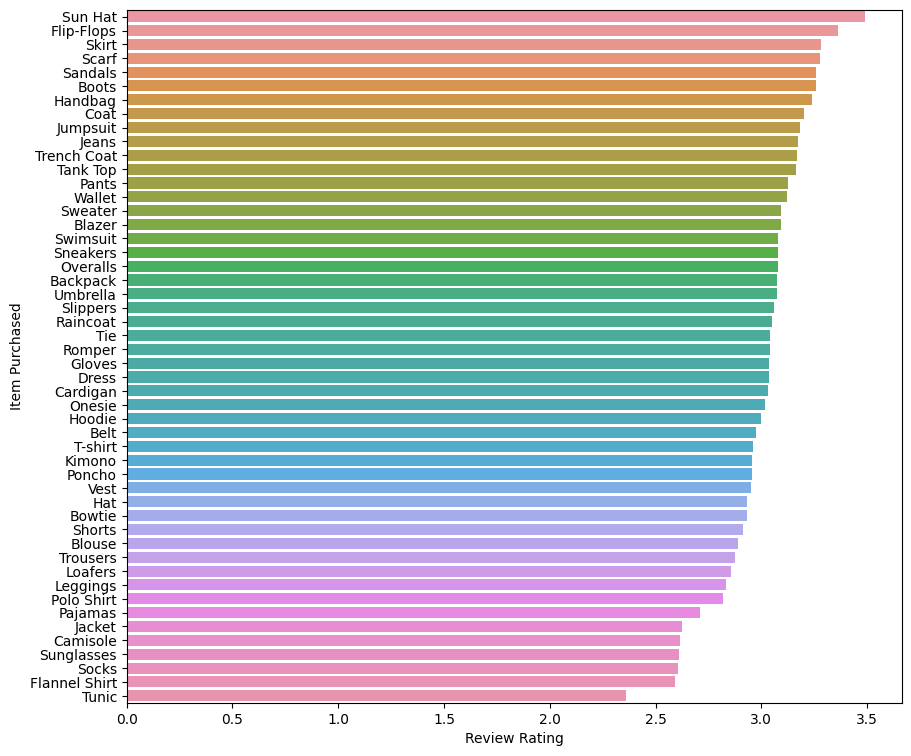

In [72]:
Rating_item = df_new.groupby('Item Purchased', as_index=False)['Review Rating'].mean()
plt.figure(figsize=(10, 9))
sns.barplot(x='Review Rating', y='Item Purchased', data=Rating_item.sort_values('Review Rating', ascending=False))
plt.show()


Jumlah Rating Penjualan Barang berdasarkan Item yang terjual

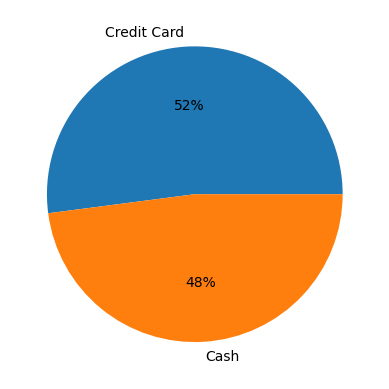

In [123]:
Payment = df_new['Payment Method'].value_counts()
plt.pie(Payment, labels = Payment.index, autopct='%.0f%%')
plt.show()

Perbandingan pembayaran metode Tunai dan Kartu Kredit